# MS211 - Trabalho Computacional (Lista 6)

Carolina Laino Mustrangi (RA: 168473)

Pedro Sader Azevedo (RA: 243245)

Humberto Vinicius Queiroz Melo (RA: 172417)

## Parte I - Implementação do Modelo SEIR

In [56]:
using Plots

In [57]:
function simular_pandemia(r0::Float64, Tinc::Float64, Tinf::Float64,
                          S1::Float64, E1::Float64, I1::Float64, R1::Float64,
                          dias_total::Integer, dias_sem_quarentena::Integer = dias_total,
                          fator_quarentena::Float64 = 1/2)
    """
    Simula a evolução do quadro demográfico de uma pandemia usando o modelo SEIR, resolvendo
    as equações diferenciais envolvidas pelo Método do Ponto Médio.
    
    r0: número de reprodução
    Tinc: tempo de incubação
    Tinf: tempo de infecção
    
    S1: valor inicial de pessoas suscetíveis à doença
    E1: valor inicial de pessoas expostas à doença
    I1: valor inicial de pessoas infectadas com doença
    R1: valor inicial de pessoas removidas (curadas, falecidas, ou isoladas em UTI)
    
    dias_total: total de dias a serem simulados
    dias_sem_quarentena: dias decorridos antes da adoção de políticas públicas de isolamento social
    fator_quarentena: número, tipicamente entre 0 e 1, pelo qual é multiplicado o r0 ao adotar
                      políticas públicas de isolamento social
    """
    
    # gerar vetores
    S = zeros(dias_total)
    E = zeros(dias_total)
    I = zeros(dias_total)
    R = zeros(dias_total)
    
    # inicializar valores iniciais
    S[1], E[1], I[1], R[1] = S1, E1, I1, R1
    
    # definir F(y) = y'
    F(y)= [-(r0/Tinf)*y[1]*y[3];
        (r0/Tinf)*y[1]*y[3]- y[2]/Tinc; 
        y[2]/Tinc- y[3]/Tinf;
        y[3]/Tinf]
    
    # resolver a equação diferencial para os dias sem isolamento social
    h = 1
    for i = 2:dias_sem_quarentena
        y05 = [S[i-1];E[i-1];I[i-1];R[i-1]] + (h/2)*F([S[i-1];E[i-1];I[i-1];R[i-1]])
        S[i], E[i], I[i], R[i] = [S[i-1];E[i-1];I[i-1];R[i-1]] + h*F(y05) 
    end
    
    # resolver a equação diferencial para os dias com isolamento social 
    r0 = r0*fator_quarentena
    for i = (dias_sem_quarentena + 1):dias_total
        y05 = [S[i-1];E[i-1];I[i-1];R[i-1]] + (h/2)*F([S[i-1];E[i-1];I[i-1];R[i-1]])
        S[i], E[i], I[i], R[i] = [S[i-1];E[i-1];I[i-1];R[i-1]] + h*F(y05)  
    end
    
    # retornar quadro demográfico completo
    return S, E, I, R
end

simular_pandemia (generic function with 4 methods)

In [58]:
r0 = 2.5
Tinc = 5.2
Tinf = 2.9
S1 = 1 - 1e-6
E1 = 1e-6
I1 = 0.0
R1 = 0.0
dias_total = 498;

In [59]:
S, E, I, R = simular_pandemia(r0, Tinc, Tinf,
                              S1, E1, I1, R1,
                              dias_total);

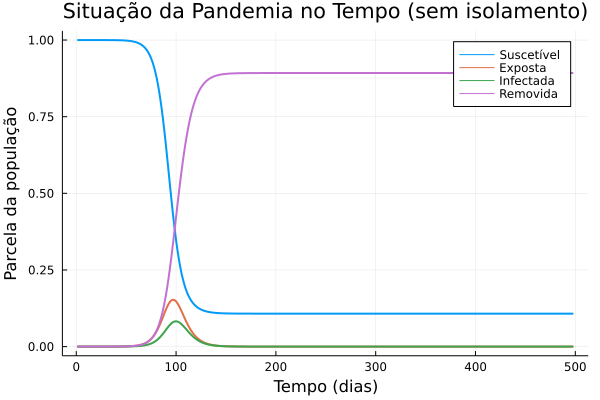

In [60]:
t = [1:1:dias_total;]
    plot(title = "Situação da Pandemia no Tempo (sem isolamento)",
      ylabel = "Parcela da população",
      xlabel = "Tempo (dias)",
      t, S, w=2, label = "Suscetível",)
plot!(t, E, w=2, label = "Exposta")
plot!(t, I, w=2, label = "Infectada")
plot!(t, R, w=2, label = "Removida")

## Parte II - Respostas às Perguntas

In [ ]:
# constantes úteis para responder às perguntas
const LEITOS_DISPONIVEIS_POR_HABITANTE = 27/100e3
const LEITOS_NECESSARIOS_POR_REMOVIDO = 0.03
const HABITANTES = 44.04e6

### Questão 1

O número máximo de pessoas doentes no mesmo dia é o valor máximo do vetor `I`. Para obter esse valor e seu índice com uma única iteração, utilizamos a função abaixo.

In [82]:
function maiorvalor(v)
    """
    Função que retorna o maior valor de um vetor e seu indice
    """
    max = 0
    max_indice = 0
    for i in 1:length(v)
        if v[i] > max
            max = v[i]
            max_indice = i
        end
    end
    return max, max_indice
end

# exemplo
maiorvalor([1, 2, 3, 4, 999, 7, 8, 9])

(999, 5)

In [ ]:
maior